# Model -  Sequential & Functional

**Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer. Each layer has weights that correspond to the layer the follows it.**


* We use the **‘add()’**  function to add layers to our model.


* **‘Dense’** is the layer type. Dense is a standard layer type that works for most cases. In a dense layer, all nodes in the previous layer connect to the nodes in the current layer.


**We define nodes in each of our input layers. This number can also be in the hundreds or thousands. Increasing the number of nodes in each layer increases model capacity. I will go into further detail about the effects of increasing model capacity shortly.**


* **‘Activation’** is the activation function for the layer. An activation function allows models to take into account nonlinear relationships.

**The first layer needs an input shape. The input shape specifies the number of rows and columns in the input.**


**The last layer is the output layer. It only has one node, two nodes as per requirment. which is for our prediction.**

# Compiling Model. 

**Compiling the model takes two parameters: optimizer and loss.**

* The **optimizer** controls the learning rate. We will be using **‘adam’** as our optmizer. 

* Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.

* The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.

* For our loss function, we will use ‘as per requirment ( regression or Classification’.

# Train

* we will use the ‘fit()’ function on our model with the following five parameters: 
* training data (train_X), 
* target data (train_y), 
* validation split, 
* number of epochs 
* callbacks.

* The validation split will randomly split the data into use for training and testing. 

* During training, we will be able to see the validation loss, If we will set the validation split at 0.2, which means that 20% of the training data we provide in the model will be set aside for testing model performance.

* The number of epochs is the number of times the model will cycle through the data. The more epochs we run, the more the model will improve, up to a certain point. After that point, the model will stop improving during each epoch. In addition, the more epochs, the longer the model will take to run. To monitor this, we will use ‘early stopping’.

* Early stopping will stop the model from training before the number of epochs is reached if the model stops improving. We will set our early stopping monitor to 3. This means that after 3 epochs in a row in which the model doesn’t improve, training will stop. Sometimes, the validation loss can stop improving then improve in the next epoch, but after 3 epochs in which the validation loss doesn’t improve, it usually won’t improve again.

* to make predictions on new data, we would use the *‘predict()’* function, passing in our new data.

**As you increase the number of nodes and layers in a model, the model capacity increases. Increasing model capacity can lead to a more accurate model, up to a certain point, at which the model will stop improving. Generally, the more training data you provide, the larger the model should be.**

#  Deep Learning Model

In [51]:
#conda install tensorflow --- in anaconda prompt

In [52]:
#conda install keras

In [53]:
import tensorflow as tf   

In [54]:
import keras

In [55]:
from tensorflow.keras import Sequential    #  model

In [56]:
from tensorflow.keras.layers import Dense

In [57]:
import numpy as np
import pandas as pd

In [58]:
data = pd.read_csv("/home/shyam/Documents/datasets/IRIS.csv") 

In [59]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [61]:
data.shape

(150, 5)

In [62]:
from sklearn.preprocessing import LabelEncoder

lc = LabelEncoder()

In [63]:
data['species'] = lc.fit_transform(data['species'])

In [64]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [65]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [66]:
X = data.iloc[:,0:4]

In [67]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [68]:
#y

In [69]:
y=data['species']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [72]:
model = Sequential()

model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [73]:
m=model.fit(X_train,y_train, epochs=300, batch_size=10, validation_split=0.2)

Epoch 1/300
10/10 [==============================] - 0s 16ms/step - loss: 1.1728 - accuracy: 0.6261 - val_loss: 1.1915 - val_accuracy: 0.5833
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 1.1849 - accuracy: 0.5932 - val_loss: 1.1676 - val_accuracy: 0.5833
Epoch 3/300
10/10 [==============================] - 0s 4ms/step - loss: 1.1459 - accuracy: 0.6041 - val_loss: 1.1544 - val_accuracy: 0.5833
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 1.0979 - accuracy: 0.6599 - val_loss: 1.1442 - val_accuracy: 0.5417
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 1.1158 - accuracy: 0.5929 - val_loss: 1.1309 - val_accuracy: 0.5417
Epoch 6/300
10/10 [==============================] - 0s 5ms/step - loss: 1.1105 - accuracy: 0.5833 - val_loss: 1.1212 - val_accuracy: 0.5417
Epoch 7/300
10/10 [==============================] - 0s 4ms/step - loss: 1.0738 - accuracy: 0.6740 - val_loss: 1.1190 - val_accuracy: 0.5000
Epoch 8/300


Epoch 59/300
10/10 [==============================] - 0s 3ms/step - loss: 0.4507 - accuracy: 0.9551 - val_loss: 0.4028 - val_accuracy: 0.9167
Epoch 60/300
10/10 [==============================] - 0s 3ms/step - loss: 0.4260 - accuracy: 0.9646 - val_loss: 0.3786 - val_accuracy: 0.9583
Epoch 61/300
10/10 [==============================] - 0s 4ms/step - loss: 0.4530 - accuracy: 0.9169 - val_loss: 0.3641 - val_accuracy: 0.9583
Epoch 62/300
10/10 [==============================] - 0s 3ms/step - loss: 0.4632 - accuracy: 0.8914 - val_loss: 0.3529 - val_accuracy: 0.9167
Epoch 63/300
10/10 [==============================] - 0s 3ms/step - loss: 0.4120 - accuracy: 0.9185 - val_loss: 0.3355 - val_accuracy: 0.9583
Epoch 64/300
10/10 [==============================] - 0s 3ms/step - loss: 0.3679 - accuracy: 0.9496 - val_loss: 0.3267 - val_accuracy: 0.9583
Epoch 65/300
10/10 [==============================] - 0s 3ms/step - loss: 0.4007 - accuracy: 0.9308 - val_loss: 0.3205 - val_accuracy: 0.9167
Epoch 

10/10 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9952 - val_loss: 0.0390 - val_accuracy: 1.0000
Epoch 174/300
10/10 [==============================] - 0s 3ms/step - loss: 0.1118 - accuracy: 0.9682 - val_loss: 0.0490 - val_accuracy: 1.0000
Epoch 175/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0850 - accuracy: 0.9862 - val_loss: 0.0393 - val_accuracy: 1.0000
Epoch 176/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0815 - accuracy: 0.9884 - val_loss: 0.0390 - val_accuracy: 1.0000
Epoch 177/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0872 - accuracy: 0.9784 - val_loss: 0.0406 - val_accuracy: 1.0000
Epoch 178/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0801 - accuracy: 0.9831 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 179/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.9738 - val_loss: 0.0389 - val_accuracy: 1.0000
Epoch 180/300

10/10 [==============================] - 0s 4ms/step - loss: 0.0791 - accuracy: 0.9845 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 288/300
10/10 [==============================] - 0s 3ms/step - loss: 0.1120 - accuracy: 0.9565 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 289/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0824 - accuracy: 0.9792 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 290/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0979 - accuracy: 0.9655 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 291/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0870 - accuracy: 0.9746 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 292/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0675 - accuracy: 0.9791 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 293/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0822 - accuracy: 0.9822 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 294/300

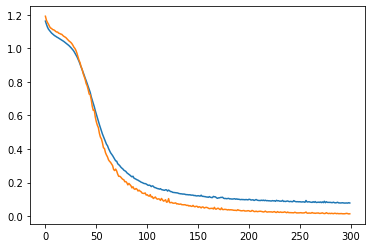

In [74]:
import matplotlib.pyplot as plt
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])

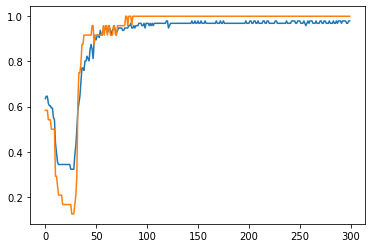

In [75]:
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])

In [76]:
score= model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 16ms/step - loss: 0.1796 - accuracy: 0.9667


In [77]:
score

[0.17958137392997742, 0.9666666388511658]

In [78]:
model.predict_classes(X_test)

array([2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1,
       2, 0, 0, 0, 1, 0, 0, 0])

In [79]:
np.argmax(model.predict(X_test), axis=-1)  # predict classes update

array([2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1,
       2, 0, 0, 0, 1, 0, 0, 0])

In [80]:
data1=data.iloc[149:150,:-1]

In [81]:
data1

,sepal_length,sepal_width,petal_length,petal_width
149,5.9,3.0,5.1,1.8


In [82]:
data.iloc[149:150,:]

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,2


In [83]:
#y_test1=data.iloc[149:150,-1]

In [84]:
#y_test1

In [85]:
#model.evaluate(data1,y_test1)

In [86]:
model.predict(data1)     #  probabilty output

array([[7.6507931e-05, 2.4465264e-01, 7.5527084e-01]], dtype=float32)

In [87]:
a=model.predict_classes(data1)   

In [88]:
a

array([2])

In [89]:
lc.inverse_transform(a)

array(['Iris-virginica'], dtype=object)

In [90]:
keras_file="clf.h5"

In [91]:
keras.models.save_model(model,keras_file)

In [92]:
from tensorflow import lite

In [93]:
converter= lite.TFLiteConverter.from_keras_model(keras_file)

In [94]:
tflite_model=converter.convert

In [95]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpbvxeel5r/assets


INFO:tensorflow:Assets written to: /tmp/tmpbvxeel5r/assets


In [98]:
model.export(export_dir=".",with_metadata=True)

AttributeError: 'Sequential' object has no attribute 'export'